In [1]:
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering, DBSCAN
import matplotlib
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('DS3_C6_S3_MallCustomers_Data_Project.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.shape

(200, 5)

In [6]:
df.ndim

2

In [7]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [8]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [10]:
df.corr()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


###### EDA

<AxesSubplot:>

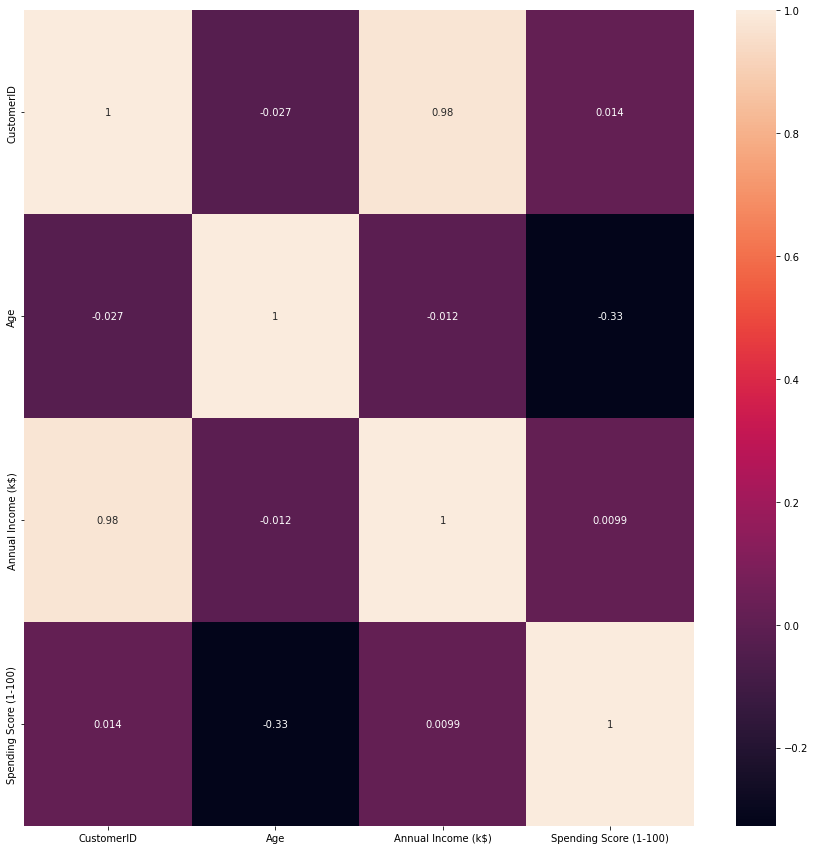

In [11]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot = True)

In [12]:
def catdet(col):
    print(f"Unique values in {col} are: {df[col].unique()}")
    print(f"Most recurring value in {col} is {st.mode(df[col])}")
    print(f"Number of missing values in {col} are {df[col].isnull().sum()}")
    
    percentage = df[col].value_counts()
    label = list(df[col].value_counts().index)

    fig, ax = plt.subplots(1, 2, figsize = (15, 10))
    
    sns.countplot(x = df[col], ax = ax[0])
    ax[0].set_title(f'count of {col}')
    
    plt.pie(percentage, labels = label, autopct = '%.2f%%')
    ax[1].set_title(f'share of {col}')

def condet(col):
    print(f"Mean of {col} is {df[col].mean()}")
    print(f"Median of the {col} is {df[col].median()}")
    print(f"Mode of the {col} is {st.mean(df[col])}")
    print(f"Standard deviation of the {col} is {df[col].std()}")
    print(f"Number of missing values in {col} are {df[col].isnull().sum()}")
    
    fig, ax = plt.subplots(1, 2, figsize = (15, 10))
    
    sns.boxplot(x = df[col], ax = ax[0], color = 'brown')
    ax[0].set_title(f'count of {col}')
    
    sns.histplot(x = df[col],bins = 10, color = 'green')
    ax[1].set_title(f'share of {col}')

Unique values in Gender are: ['Male' 'Female']
Most recurring value in Gender is Female
Number of missing values in Gender are 0


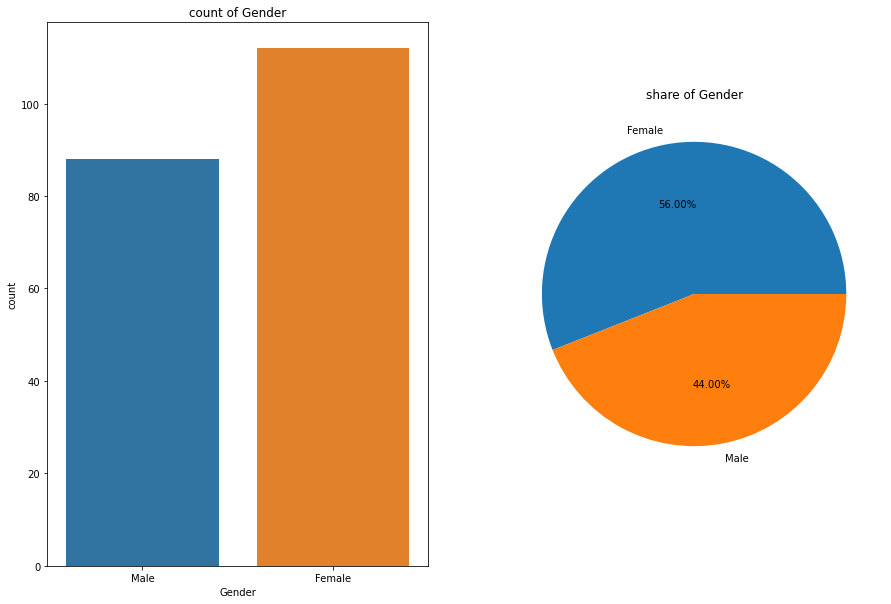

In [13]:
catdet('Gender')

Mean of Annual Income (k$) is 60.56
Median of the Annual Income (k$) is 61.5
Mode of the Annual Income (k$) is 60.56
Standard deviation of the Annual Income (k$) is 26.264721165271254
Number of missing values in Annual Income (k$) are 0


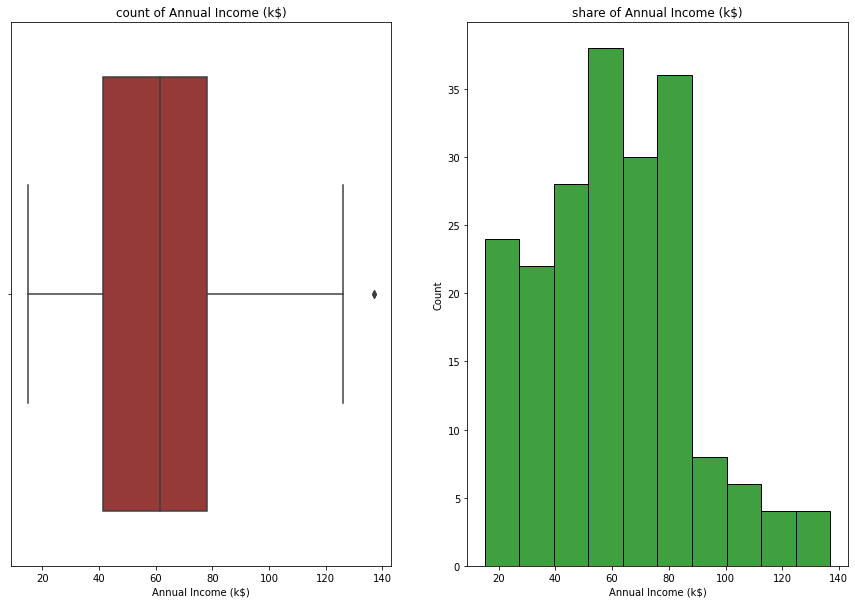

In [14]:
condet('Annual Income (k$)')

In [15]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

Mean of Age is 38.85
Median of the Age is 36.0
Mode of the Age is 38.85
Standard deviation of the Age is 13.969007331558883
Number of missing values in Age are 0


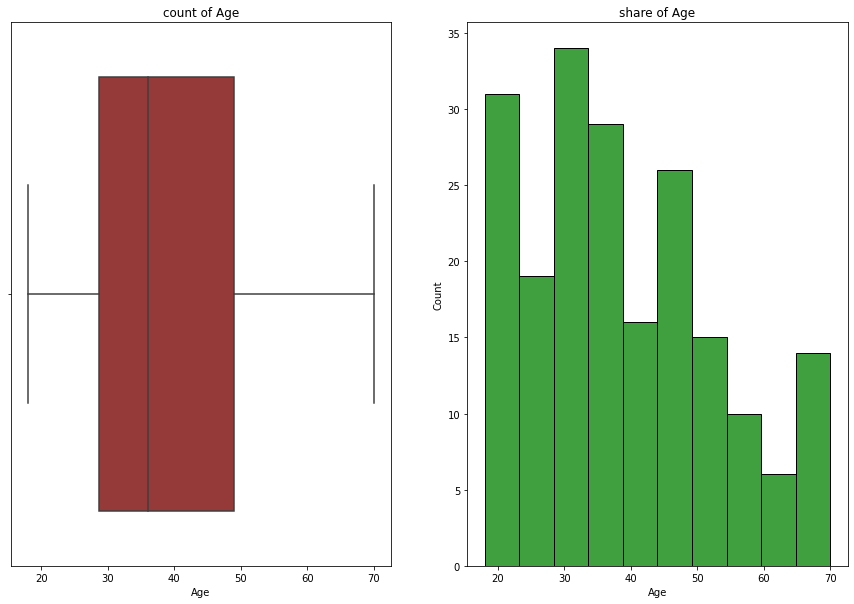

In [16]:
condet('Age')

Mean of Spending Score (1-100) is 50.2
Median of the Spending Score (1-100) is 50.0
Mode of the Spending Score (1-100) is 50.2
Standard deviation of the Spending Score (1-100) is 25.823521668370162
Number of missing values in Spending Score (1-100) are 0


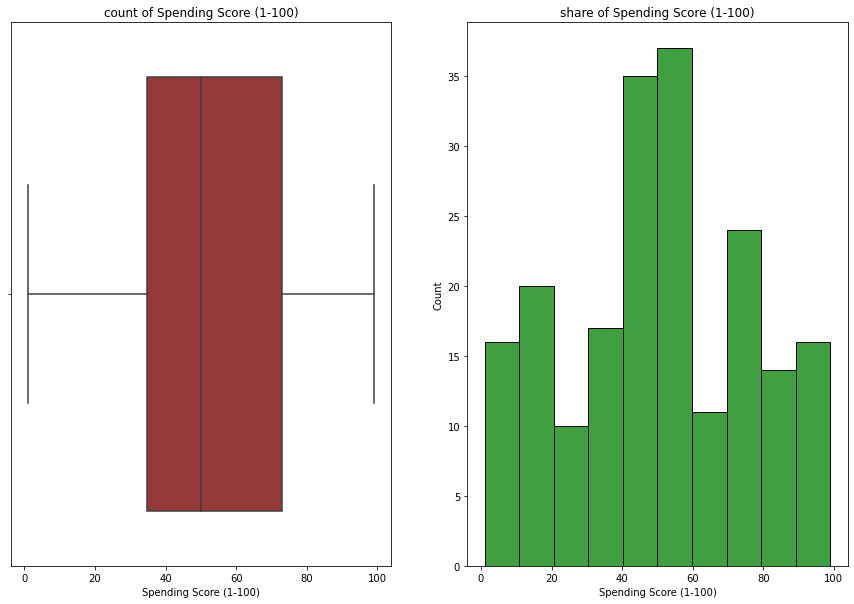

In [17]:
condet('Spending Score (1-100)')

In [18]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

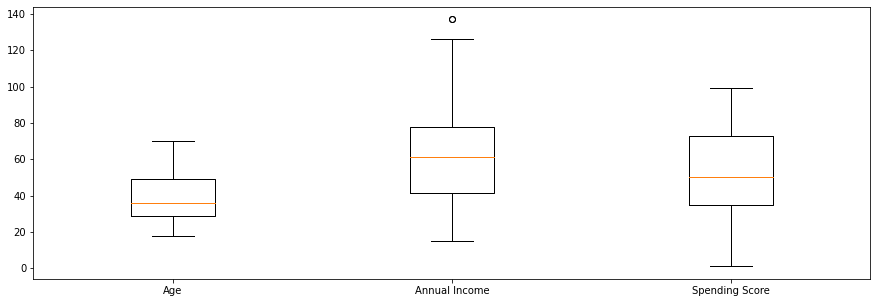

In [19]:
plt.figure(figsize=(15, 5))
plt.boxplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.xticks([1, 2, 3], ['Age', 'Annual Income', 'Spending Score']);

###### encoding

In [20]:
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = LabelEncoder().fit_transform(df[i])

In [21]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


###### Scaling

In [22]:
df = pd.DataFrame(StandardScaler().fit_transform(df), columns = df.columns)

In [23]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.723412,1.128152,-1.424569,-1.738999,-0.434801
1,-1.706091,1.128152,-1.281035,-1.738999,1.195704
2,-1.688771,-0.886405,-1.352802,-1.700830,-1.715913
3,-1.671450,-0.886405,-1.137502,-1.700830,1.040418
4,-1.654129,-0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...,...
195,1.654129,-0.886405,-0.276302,2.268791,1.118061
196,1.671450,-0.886405,0.441365,2.497807,-0.861839
197,1.688771,1.128152,-0.491602,2.497807,0.923953
198,1.706091,1.128152,-0.491602,2.917671,-1.250054


###### splitting data in dependent and independent variables

In [24]:
x = df.drop(columns = ['Spending Score (1-100)'])
y = df['Spending Score (1-100)']

###### splitting x and y in train test split

In [25]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size = 0.7, random_state = 1)

In [26]:
for i in [xtrain, xtest, ytrain, ytest]:
    print(i.shape)

(140, 4)
(60, 4)
(140,)
(60,)


###### knearest

In [27]:
mod = KNeighborsRegressor(n_neighbors=3)

In [28]:
mod.fit(xtrain, ytrain)

KNeighborsRegressor(n_neighbors=3)

In [29]:
ypred = mod.predict(xtest)

In [30]:
for a, b in zip(ytest, ypred):
    print(f'{b} was predicted against the actual value of {a}')

-0.16305055498843063 was predicted against the actual value of 0.03105724856922475
-0.020704832379483354 was predicted against the actual value of -0.5900877228152724
-0.7583144858985739 was predicted against the actual value of -1.405340497757425
-0.08540743356536849 was predicted against the actual value of 0.34162973426147336
-1.0171248906421144 was predicted against the actual value of -0.43480147996914814
-0.007764312142306366 was predicted against the actual value of -1.2500542549113007
-0.07246691332819145 was predicted against the actual value of 0.06987880928075582
0.05693828904357882 was predicted against the actual value of -0.3959799192576171
0.8333695032742003 was predicted against the actual value of 1.4286334341843434
0.8980721044600853 was predicted against the actual value of -0.900660208507521
1.3121687520497503 was predicted against the actual value of 0.9627747056459706
-1.379459457283071 was predicted against the actual value of -0.823017087084459
0.056938289043578

In [31]:
scor = mod.score(xtest, ytest)
scor

0.2442803257306021

In [32]:
print(f'{round(scor*100, 2)}%')

24.43%


###### k means

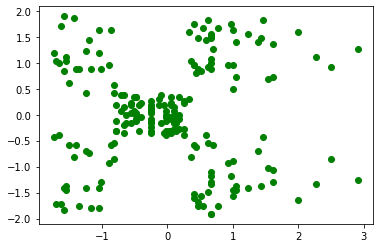

In [33]:
x = df.iloc[:,[3,4]].values
plt.scatter(x[:,0], x[:,1], marker='o', c='green')

In [34]:
Kmeans_model = KMeans(n_clusters=5)
Kmeans_model.fit(x)
cluster_center = Kmeans_model.cluster_centers_
labels = Kmeans_model.labels_
labels, cluster_center

(array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
        4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1,
        4, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 3, 1, 3, 0, 3, 0, 3,
        1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
        0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
        0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
        0, 3]),
 array([[ 1.05500302, -1.28443907],
        [-0.20091257, -0.02645617],
        [-1.32954532,  1.13217788],
        [ 0.99158305,  1.23950275],
        [-1.30751869, -1.13696536]]))

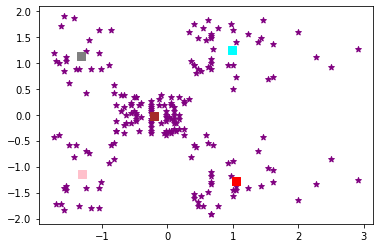

In [35]:
plt.scatter(x[:,0], x[:,1],marker ='*', c='purple')
plt.scatter(1.05500302,  -1.28443907, s=50, c='r', marker='s')
plt.scatter(-1.32954532, 1.13217788, s=50, c='grey', marker='s')
plt.scatter(0.99158305, 1.23950275, s=50, c='cyan', marker='s')
plt.scatter(-0.20091257, -0.02645617, s=50, c='brown', marker='s')
plt.scatter(-1.30751869, -1.13696536, s=50, c='pink', marker='s')

Text(0, 0.5, 'Distorsions')

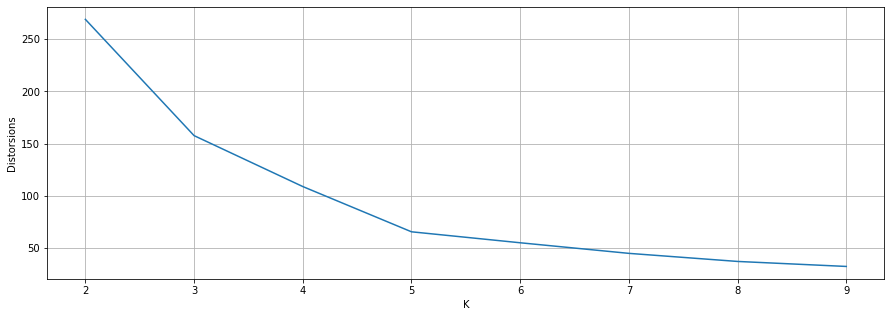

In [36]:
distorsions = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    distorsions.append(kmeans.inertia_)
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), distorsions)
plt.grid(True)
plt.xlabel('K')
plt.ylabel('Distorsions')

For n clusters = 2 The average silhouette_score is : 0.28640637225274423
For n clusters = 3 The average silhouette_score is : 0.46658474419000145
For n clusters = 4 The average silhouette_score is : 0.4939069237513199
For n clusters = 5 The average silhouette_score is : 0.5546571631111091
For n clusters = 6 The average silhouette_score is : 0.5377141165734254
For n clusters = 7 The average silhouette_score is : 0.45298064520649645
For n clusters = 8 The average silhouette_score is : 0.4550112502601921
For n clusters = 9 The average silhouette_score is : 0.45435433918236995
For n clusters = 10 The average silhouette_score is : 0.4505029621610447
For n clusters = 11 The average silhouette_score is : 0.4364474909579185


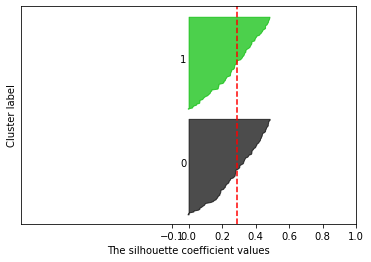

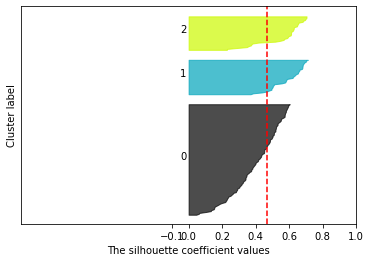

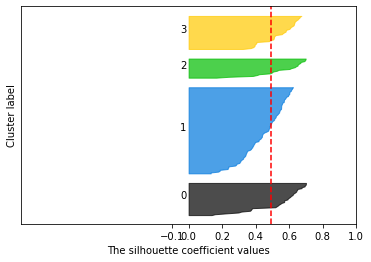

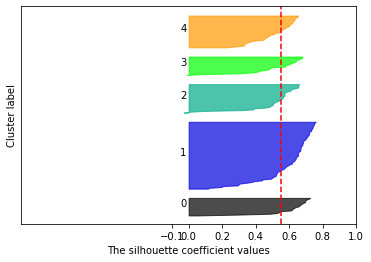

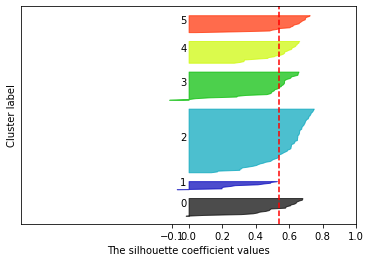

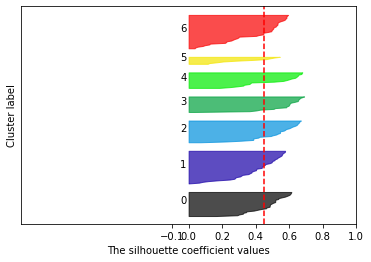

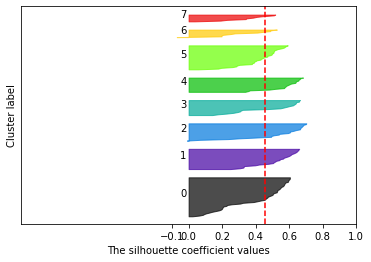

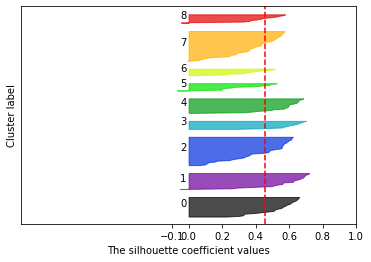

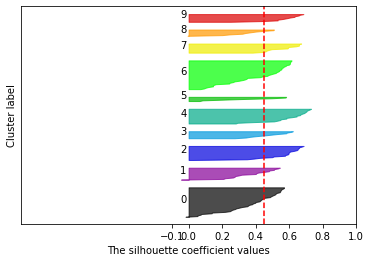

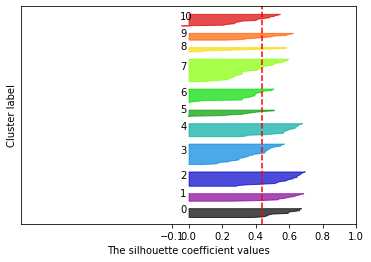

In [37]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm


for n in range(2, 12):
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-1, 1])
    ax1.set_ylim([0, len(x)+(n+1)*10])
    
    clusterer = KMeans(n_clusters=n, random_state=10)
    cluster_labels = clusterer.fit_predict(x)
    
    silhouette_avg = silhouette_score(x, cluster_labels)
    
    print("For n clusters =", n,"The average silhouette_score is :", silhouette_avg)
    
    sample_silhouette_values = silhouette_samples(x, cluster_labels)
    y_lower = 10
    
    for i in range(n):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels==i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower+size_cluster_i
        color = cm.nipy_spectral(float(i) / n)
        #ax1.fill_between(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor = color, edgecolor = color, alpha = 0.7)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        
        ax1.text(-0.05,y_lower+0.5*size_cluster_i, str(i))
        
        y_lower = y_upper+10
        
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

###### Heirarchical clustering

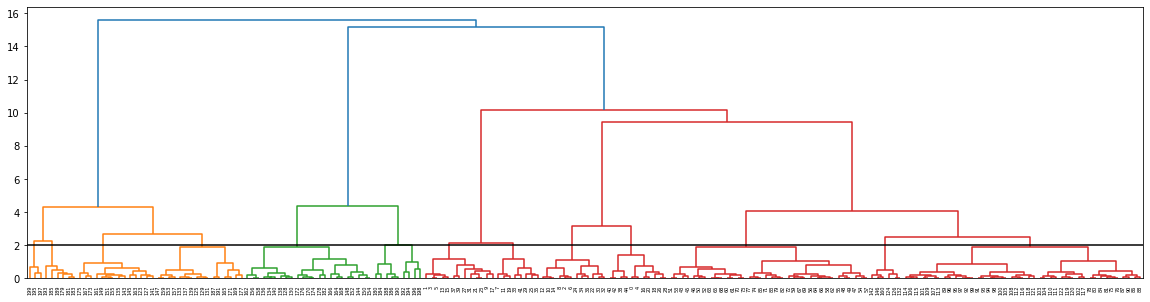

In [38]:
plt.figure(figsize=(20, 5))
denogram = sch.dendrogram(sch.linkage(x,method='ward'))
plt.axhline(2, color = 'black')
ax = plt.gca()

In [39]:
hc= AgglomerativeClustering (n_clusters=5, affinity= 'euclidean', linkage='ward') 
y_pred = hc.fit_predict(x)
y_pred[:5]

array([4, 3, 4, 3, 4], dtype=int64)

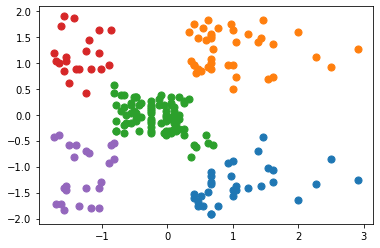

In [40]:
plt.scatter(x[y_pred == 0,0],x[y_pred == 0,1], s = 50)
plt.scatter(x[y_pred == 1,0],x[y_pred == 1,1], s = 50)
plt.scatter(x[y_pred == 2,0],x[y_pred == 2,1], s = 50)
plt.scatter(x[y_pred == 3,0],x[y_pred == 3,1], s = 50)
plt.scatter(x[y_pred == 4,0],x[y_pred == 4,1], s = 50)

###### DBscan

In [41]:
colors=['purple','red','blue','green']

In [42]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


In [43]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(X[['Annual Income (k$)','Spending Score (1-100)']])

DBSCAN()

Text(0, 0.5, 'Feature 2')

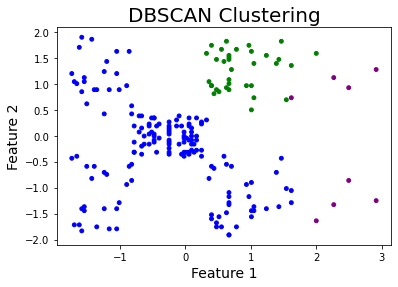

In [44]:
X['DBSCAN_labels']=dbscan.labels_
plt.scatter(X['Annual Income (k$)'],X['Spending Score (1-100)'],c=X['DBSCAN_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)

###### getting hyperparameters

In [45]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X[['Annual Income (k$)','Spending Score (1-100)']])
distances, indices = nbrs.kneighbors(X[['Annual Income (k$)','Spending Score (1-100)']])

Text(0, 0.5, 'Epsilon')

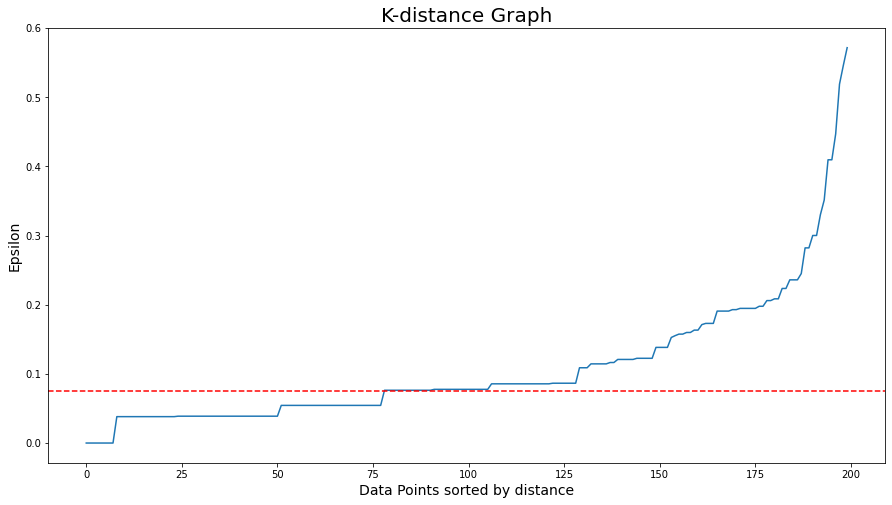

In [46]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(15,8))
plt.plot(distances)
plt.axhline(y=0.075, color='r', linestyle='--')
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)

In [47]:
eps=0.075
for min_samples in [10, 11, 12, 13]:
    clusterer = DBSCAN(eps=eps, min_samples=min_samples)
    cluster_labels = clusterer.fit_predict(X)
    x= cluster_labels +2
    y = np.bincount(x)
    ii = np.nonzero(y)[0]
    results = list(zip(ii,y[ii]) )
    print('eps=',eps,'| min_samples= ', min_samples, '| obtained clustering: ', results)

eps= 0.075 | min_samples=  10 | obtained clustering:  [(1, 200)]
eps= 0.075 | min_samples=  11 | obtained clustering:  [(1, 200)]
eps= 0.075 | min_samples=  12 | obtained clustering:  [(1, 200)]
eps= 0.075 | min_samples=  13 | obtained clustering:  [(1, 200)]


###### applying dbscan with optimum hyperparametes

In [48]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=0.075,min_samples=12)
dbscan_opt.fit(X[['Annual Income (k$)','Spending Score (1-100)']])

DBSCAN(eps=0.075, min_samples=12)

In [49]:
X['DBSCAN_opt_labels']=dbscan_opt.labels_
X['DBSCAN_opt_labels'].value_counts()

-1    200
Name: DBSCAN_opt_labels, dtype: int64

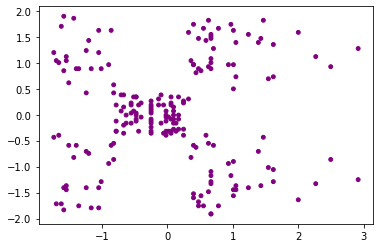

In [50]:
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=X['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)

KMeans is giving us the best clusters